In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.decomposition import PCA


if not os.path.exists('data'):
    os.makedirs('data')

df = pd.read_csv('datasets/nba_final.csv')

## Choose the important stats

In [2]:
# Supondo que df seja o seu DataFrame
columns_to_exclude = ["Player", "Tm", "Pos"]
columns_to_include = [col for col in df.columns if col not in columns_to_exclude]

# Selecionando apenas as colunas desejadas
stats = df[columns_to_include]

## PCA

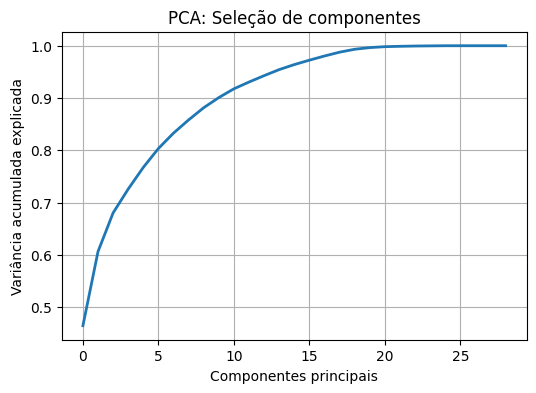

In [3]:
# Padronizando os dados
data = StandardScaler().fit_transform(stats)

# Configurando e executando o PCA
pca = PCA()
pca_data = pca.fit_transform(data)

# Percentual de variância explicada por cada componente
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)

# Variância acumulada explicada
cum_var_explained = np.cumsum(percentage_var_explained)

# Plotando o gráfico da variância acumulada
plt.figure(1, figsize=(6, 4))
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('Componentes principais')
plt.ylabel('Variância acumulada explicada')
plt.title('PCA: Seleção de componentes')

plt.show()


## Hash Table with similarity players

In [4]:
# # Selecione as colunas com estatísticas numéricas
# stats_columns = df.columns.difference(['Player', 'Tm', 'Pos','Salario_2022/2023', 'Age', 'Weight','Height' ])

# # Função para buscar o vetor de estatísticas
# def getStats(player_name):
#     return df.loc[df['Player'] == player_name, stats_columns].values[0]

# # Função para calcular a similaridade do cosseno
# def similarity(player1, player2):
#     return 1 - distance.cosine(getStats(player1), getStats(player2))

# def normalize_data(engine):
#     # Crie um array com todas as métricas de similaridade
#     all_metrics = np.array(list(engine.values()))
    
#     # Normalização min-max de todas as métricas
#     min_val = np.min(all_metrics[all_metrics > 0])  # Exclua 0, que é a similaridade com o próprio jogador
#     max_val = np.max(all_metrics)
    
#     # Aplicar a normalização min-max em cada vetor de similaridade
#     for player in engine:
#         engine[player] = (engine[player] - min_val) / (max_val - min_val)
        
#     return engine

# # Função para calcular a matriz de similaridade antes da normalização
# def calculate_similarity_vectors(player_names, stats_columns):
#     engine = {}
#     for query in tqdm(player_names):
#         query_stats = getStats(query)
#         metric = []
#         for player in player_names:
#             player_stats = getStats(player)
#             if query != player:  # Não calcular a similaridade de um jogador com ele mesmo
#                 value = 1 - distance.cosine(query_stats, player_stats)
#                 metric.append(value)
#             else:
#                 metric.append(0.0)  # Similaridade com o próprio jogador definida como 0
#         engine[query] = np.array(metric)
#     return engine

# # Carregar os dados e calcular o vetor de similaridades
# player_names = df['Player'].tolist()
# engine = calculate_similarity_vectors(player_names, stats_columns)

# # Normalizar os dados
# engine = normalize_data(engine)

# # Salvar o hash table como pickle
# with open('data/engine.pickle', 'wb') as file:
#     pickle.dump(engine, file)


## Testing with 2 different players

In [5]:
# Carregar o hash table de similaridades
with open(r'data\engine.pickle', 'rb') as file:
    engine = pickle.load(file)

# Obter o nome dos jogadores
player_names = list(engine.keys())

# Encontrar o índice para 'Aaron Holiday'
aaron_holiday_index = player_names.index('Damian Lillard')

# Obter a similaridade de 'Austin Rivers' com todos os outros jogadores
austin_rivers_similarity = engine['Stephen Curry']

# Obter a similaridade entre 'Austin Rivers' e 'Aaron Holiday'
similarity_value = austin_rivers_similarity[aaron_holiday_index]

print(f"A similaridada é: {similarity_value}")


A similaridada é: 0.9974576236160478


## Input to get Recommendation

In [6]:
print("Welcome to Perfect Match NBA players!")
print("\nWhich team do you want to pick a player from?")

# Print teams available in dataset
teams = df['Tm'].unique()
print(teams)

# Input team name with validation
while True:
    team = input("Enter team name: ")
    if team in teams:
        break
    else:
        print("Team not found. Please enter a valid team name from the list above.")

print("\nWhich player do you want to pick from {}?".format(team))

# Show all players in the team
players_in_team = df.loc[df['Tm'] == team, 'Player']
print(players_in_team)

# Input player name with validation
while True:
    player = input("\nEnter player name: \n")
    if player in players_in_team.values:
        break
    else:
        print("Player not found in {}. Please enter a valid player name from the list above.".format(team))

print("\nYou chose " + player + " from the " + team + " team.")


Welcome to Perfect Match NBA players!

Which team do you want to pick a player from?
['TOR' 'MEM' 'MIA' 'UTA' 'MIL' 'CLE' 'NOP' 'MIN' 'ORL' 'NYK' 'WAS' 'PHO'
 'DET' 'GSW' 'CHO' 'SAS' 'SAC' 'LAC' 'OKC' 'DAL' 'LAL' 'IND' 'ATL' 'CHI'
 'DEN' 'BOS' 'POR' 'PHI' 'HOU' 'BRK']

Which player do you want to pick from CLE?
7         Jarrett Allen
118      Mamadi Diakite
156      Darius Garland
289        Caris LeVert
297         Robin Lopez
298          Kevin Love
329         Sam Merrill
337    Donovan Mitchell
338         Evan Mobley
339       Isaiah Mobley
358           Raul Neto
372         Isaac Okoro
377          Cedi Osman
424         Ricky Rubio
457       Lamar Stevens
489           Dean Wade
527       Dylan Windler
Name: Player, dtype: object

You chose Donovan Mitchell from the CLE team.


## Pick the best similarity players from Ash Table

In [7]:
#Carregar o hash table de similaridades
def print_player_vector(player_name):
    if player_name in engine:
        print(f"Vetor de características para {player_name}:")
        print(engine[player_name])
    else:
        print(f"Jogador '{player_name}' não encontrado.")

print_player_vector(player)

Vetor de características para Donovan Mitchell:
[ 0.83134952  0.95953756  0.98561268  0.88485234  0.82811038  0.70196711
  0.96142886  0.97476707  0.80022942  0.95108059  0.9834103   0.61052549
  0.76392797  0.98852407  0.79416417  0.92318423  0.98309573  0.73461372
  0.95790906  0.67116762  0.94952683  0.77655313  0.99082128  0.9989283
  0.73665276  0.69633212  0.96968442  0.98050256  0.99148772  0.71086217
  0.7339333   0.94376453  0.80322963  0.70183377  0.99249834  0.87567821
  0.79669013  0.67464282  0.94886018  0.92913585  0.68362741  0.69768561
  0.78824595  0.67569544  0.82445617  0.99836811  0.90844644  0.66036325
  0.99120419  0.76314491  0.67491357  0.71252438  0.51301737  0.66476397
  0.92646052  0.56417558  0.6905406   0.98579184  0.68411773  0.72016223
  0.97978914  0.89463295  0.6883647   0.99873599  0.65024794  0.68219004
  0.53653969  0.92275722  0.99731904  0.90757475  0.93815882  0.81891407
  0.57663533  0.63298081  0.99232158  0.72815089  0.71754107  0.96271895
  0.

In [8]:
df_ler = pd.read_csv('datasets/nba_final.csv')

# Carregar o hash table de similaridades
with open(r'data\engine.pickle', 'rb') as file:
    engine = pickle.load(file)

def get_player_info(player_name):
    player_info = df.loc[df['Player'] == player_name, ['Pos', 'Tm']].iloc[0]
    return player_info['Pos'], player_info['Tm']

def top_five_similar_players(player_name):
    # Verificar se o jogador existe no hash table
    if player_name not in engine:
        print(f"Jogador '{player_name}' não encontrado.")
        return
    
    # Obter a posição e a equipe do jogador
    player_pos, player_team = get_player_info(player_name)

    # Definir posições complementares com base na posição do jogador
    complementary_positions = {
        'PG': ['PG', 'SG'],
        'SG': ['SG', 'PG'],
        'SF': ['SF', 'PF'],
        'PF': ['PF', 'SF'],
        'C':  ['C']
    }
    
    # Obter o vetor de similaridade para o jogador fornecido
    similarity_vector = engine[player_name]

    # Obter as posições e equipes de todos os jogadores
    all_players_info = df_ler.set_index('Player')

    # Imprimir as estatísticas do jogador selecionado
    if player_name in all_players_info.index:
        print("Estatísticas do Jogador Selecionado:")
        print(all_players_info.loc[[player_name]].to_string(), "\n")

    # Filtrar jogadores que são da mesma posição ou da posição complementar e não da mesma equipe
    eligible_positions = complementary_positions.get(player_pos, [player_pos])
    eligible_players = all_players_info[(all_players_info['Pos'].isin(eligible_positions)) & (all_players_info['Tm'] != player_team)]

    # Encontrar os índices dos valores de similaridade para os jogadores elegíveis
    player_names = list(engine.keys())  # Asumindo que esta é a lista de todos os jogadores no engine
    eligible_indices = [player_names.index(player) for player in eligible_players.index if player in player_names]

    # Filtrar o vetor de similaridade para incluir apenas os jogadores elegíveis
    eligible_similarity = similarity_vector[eligible_indices]

    # Encontrar os índices dos cinco maiores valores dentro dos jogadores elegíveis
    top_indices = np.argsort(eligible_similarity)[::-1][:5]

    # Mapear os índices para os nomes dos jogadores
    top_players = [eligible_players.index[i] for i in top_indices]
    
    # Obter as informações dos jogadores e similaridade como uma tabela
    top_players_info = all_players_info.loc[top_players]
    top_players_info['Similaridade'] = eligible_similarity[top_indices]

    # Imprimir a tabela dos cinco jogadores mais semelhantes
    print("Top 5 Jogadores Semelhantes:")
    print(top_players_info.to_string())
    return top_players_info

# Exemplo de uso:
top_players_info = top_five_similar_players(player)




Estatísticas do Jogador Selecionado:
                 Pos  Age   Tm   G  GS    MP    FG   FGA    FG%   3P  3PA    3P%   2P   2PA    2P%   eFG%   FT  FTA    FT%  ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS  Salario_2022/2023  Weight  Height
Player                                                                                                                                                                                                     
Donovan Mitchell  SG   26  CLE  68  68  35.8  10.0  20.6  0.484  3.6  9.3  0.386  6.4  11.3  0.566  0.572  4.7  5.4  0.867  0.9  3.3  4.3  4.4  1.5  0.4  2.6  2.5  28.3           30913750    97.0     6.1 

Top 5 Jogadores Semelhantes:
                Pos  Age   Tm   G  GS    MP   FG   FGA    FG%   3P  3PA    3P%   2P   2PA    2P%   eFG%   FT  FTA    FT%  ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS  Salario_2022/2023     Weight    Height  Similaridade
Player                                                                                             

## PCA 3D GRAPH

In [9]:
import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Carregar os dados
data = pd.read_csv('datasets/nba_final.csv')

# Selecione apenas as colunas numéricas para calcular a média
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[num_cols] = data[num_cols].fillna(data[num_cols].mean())

posicao_do_jogador = data[data['Player'] == player]['Pos'].values[0]

mapeamento_posicoes = {
    'PG': ['PG', 'SG'],
    'SG': ['PG', 'SG'],
    'SF': ['SF', 'PF'],
    'PF': ['SF', 'PF'],
    'C': ['C']
}
# Obtenha as posições desejadas com base na posição original
posicoes_desejadas = mapeamento_posicoes.get(posicao_do_jogador, [])

# Filtrar o DataFrame com base nas posições desejadas
data_filtered = data[data['Pos'].isin(posicoes_desejadas)]

jogadores_destaque_verde = []
for top_players_info in top_players_info.index:
    jogadores_destaque_verde.append(top_players_info)

# Carregar os dados
data = pd.read_csv('datasets/nba_final.csv')

# Selecione apenas as colunas numéricas para calcular a média
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[num_cols] = data[num_cols].fillna(data[num_cols].mean())

# Selecionar features numéricas
features = ['G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
            'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 
            'PTS']
x = data_filtered.loc[:, features].values

# Normalizar os dados
x = StandardScaler().fit_transform(x)

# Executar PCA para reduzir para 3 componentes
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)

# Criar um DataFrame com os componentes principais
df_principal = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2', 'PC3'])

# Adiciona os nomes dos jogadores ao DataFrame
df_principal['Player'] = data_filtered['Player'].values

# Escolha o jogador que você deseja destacar em vermelho
jogador_destaque_vermelho = player

# Crie a coluna 'Cor' e atribua a cor azul a todos os pontos
df_principal['Cor'] = 'blue'

# Modifique a cor do ponto para vermelho se for o jogador destacado em vermelho
df_principal.loc[df_principal['Player'] == jogador_destaque_vermelho, 'Cor'] = 'red'

# Modifique a cor do ponto para verde para os jogadores destacados em verde
df_principal.loc[df_principal['Player'].isin(jogadores_destaque_verde), 'Cor'] = 'green'

# Criar um gráfico 3D interativo
fig = px.scatter_3d(df_principal, x='PC1', y='PC2', z='PC3',
                    text='Player', title='3D PCA de Jogadores da NBA',
                    color='Cor',  # Use a coluna 'Cor' para as cores dos pontos
                    color_discrete_map={"red": "red", "green": "green", "blue": "blue"})  # Mapeamento direto das cores

# Atualizar os marcadores para que o texto seja exibido sempre
fig.update_traces(textposition='top center')

# Mostrar o gráfico
fig.show()